# WorldCloud And Top 10 word

In [1]:
pip install wordcloud

     |████████████████████████████████| 160 kB 637 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [15]:
conda install -c conda-forge tweepy 

Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - tweepy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    blinker-1.4                |             py_1          13 KB  conda-forge
    oauthlib-3.0.1             |             py_0          82 KB  conda-forge
    pyjwt-1.7.1                |             py_0          17 KB  conda-forge
    requests-oauthlib-1.2.0    |             py_0          19 KB  conda-forge
    tweepy-3.8.0               |             py_0          26 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         158 KB

The following NEW packages will be INSTALLED:

  blinker            conda-forge/noarch::blinker-1.4-py_1
  oauthlib           conda-forge/noarch::oauthlib-3.0.1-py_0
  pyjwt              conda-forge/noarch::p

In [1]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns
import os 
from textblob import Word
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
#nltk.download('wordnet')
import tweepy
import time
import random


In [2]:
consumer_key ='SPi1R25BOz2HIZmQdpDAu8l3x'
consumer_secret ='IeQ2X0wyV5uDWsxcHyx2hvkTY9hcXMYBDPyr4alevLszzZE6fZ'
access_token ='1019708295043534850-ZNzdZQxFJFXvrrhiiRfFAihXv8rDRz'
access_token_secret ='kmYYP876OjA9MoBGO8J04oY4iXuNc38lutFAU0OKGy8dn'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api=tweepy.API(auth)

In [83]:
def renkUret(sayi):
    renkListesi=[]
    for x in range(0,sayi):
        renk = "#"
        for i in range(6):
            renk= renk + random.choice("ABCDEF0123456789")
        renkListesi.append(renk)
    return renkListesi

def ozgunlukOranı(data):
    ozgunlukoranı=df[~df["text"].str.startswith("RT")].count()["id"] / len(df) #Özgünlük oranı
    yazi='Tweetlerin özgünlük oranı :{}'.format(round(ozgunlukoranı,3))
    return yazi

def tweetsayisi(data):
    yazi= 'Toplam tweet sayısı :{}'.format(data['id'].count())
    return yazi

def timeline(veri,id):
    veri=country.loc[country['id']==id,['timeline']]
    veri=veri['timeline'][0].split(",")
    return veri
     
def csvoku(dosya):
    veri=pd.read_csv(dosya+'.csv', encoding='utf_8')
    return veri

def csvyaz(dosya,veri):
    veri.to_csv(dosya+'.csv', mode='a',index=False)
    print("Dosya yazıldı")

def ilkcsvyazma(dosya,veri):
    veri.to_csv(dosya+'.csv', mode='w',index=False)
    print("Dosya yazıldı")

def dosyaOlustur(dosyaNo):
    liste=os.listdir()
    sonuc=True
    for x in liste :
        if dosyaNo != x:
            os.system("mkdir {}  {}".format(dosyaNo,os.getcwd()))
        else:
            print("Girdiğini {} nolu dosya kayıtlıdır...".format(dosyaNo))
            sonuc=False
    if(sonuc==True):
        print(" {} nolu dosya oluşturuldu...".format(dosyaNo))
        
    return dosyaNo




def detaylıTweet(hstg):
    import pandas as pd
    tweetler = api.search(q = hstg, lang = "tr", result_type = "recent", count =1000)
    id_list = [tweet.id for tweet  in tweetler]
    df = pd.DataFrame(id_list, columns = ["id"])
    
    df["profile_image_url"] = [tweet.author.profile_image_url for tweet in tweetler]
    df["text"] = [tweet.text for tweet in tweetler]   
    df["created_at"] = [tweet.created_at for tweet in tweetler]
    df["timeline"] = [tweet.author.timeline for tweet in tweetler]
    df["retweeted"] = [tweet.retweeted for tweet in tweetler]
    df["retweet_count"] = [tweet.retweet_count for tweet in tweetler]
    df["source"] = [tweet.source for tweet in tweetler]
    df["user_screen_name"] = [tweet.author.screen_name for tweet in tweetler]
    df["user_followers_count"] = [tweet.author.followers_count for tweet in tweetler]
    df["user_location"] = [tweet.author.location for tweet in tweetler]
    df["Hashtags"] = [tweet.entities.get('hashtags') for tweet in tweetler]
    df["source"] = [tweet.source for tweet in tweetler]
    df["screen_name"] = [tweet.author.screen_name for tweet in tweetler]
    df["location"] = [tweet.author.location for tweet in tweetler]
    df["statuses_count"] = [tweet.author.statuses_count for tweet in tweetler]
    df["friends_count"] = [tweet.author.friends_count for tweet in tweetler]
    df["favourites_count"] = [tweet.author.favourites_count for tweet in tweetler]
   
    return df

def basitHashtag(hstg,tweetAdeti):   
    adet=int(tweetAdeti)
    tweetler = api.search(q = hstg, lang = "tr", result_type = "recent", count =adet )
    data = pd.DataFrame(data=[tweet.text for tweet in tweetler], columns=['text'])
    return data.text

def textMining(df):
    #buyuk-kucuk donusumu
    df['text'] = df['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

    #noktalama işaretleri
    df['text'] = df['text'].str.replace('[^\w\s]','') 
    
    #sayılar
    df['text'] = df['text'].str.replace('\d','')

    #stopwords
    sw = stopwords.words('turkish')
    df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

    #lemmi  
    df['text'] = df['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()])) 

    #noktalama işaretleri
    df['text'] = df['text'].str.replace('rt','') 
    
    #df = df.drop('id', 1)    İd satırını siler
    return df



def istentweetadeti(csv,istenenTweetAdeti,hastag):
    istenenTweetAdeti=int(istenenTweetAdeti)
    okunanVeri=pd.read_csv(csv+".csv",encoding='utf_8')
    olanTweetSayisi=okunanVeri['id'].count()
    olanTweetSayisi=int(olanTweetSayisi)
    gelenSayiHesapla=okunanVeri['id'].count()
    print('Bulunan tweet sayısı {}'.format(olanTweetSayisi))
    while olanTweetSayisi < (gelenSayiHesapla+istenenTweetAdeti):
        tweetler=detaylıTweet(hastag)
        tweetler.to_csv(csv+'.csv', mode='a',index=False,header=False,encoding='utf_8')
        okunanVeri=pd.read_csv(csv+".csv",encoding='utf_8')
        olanTweetSayisi=okunanVeri['id'].count()
        print('Toplam Gelen tweet sayısı {}'.format(olanTweetSayisi-gelenSayiHesapla))     
    olanTweetSayisi=okunanVeri['id'].count()
    print('Yeni gelen {} ile birlikte toplam {} tweet vardır '.format(olanTweetSayisi-gelenSayiHesapla,olanTweetSayisi))



def gecenKelimeler(kayitAdresi,dosyaNo) :
    freq_df = df["text"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis =0).reset_index()
    freq_df.columns = ["kelimeler","frekanslar"] #Verileri Sıralar
    x=freq_df[freq_df.frekanslar > freq_df.frekanslar.mean() + freq_df.frekanslar.std()]
    siralama=x.sort_values(by='frekanslar',ascending=False)
    #Verileri Sıralar ve kelimenin kullanım oranını verir
    siralama.to_csv(kayitAdresi+"/"+dosyaNo+"/"+(dosyaNo+".csv"))
    return siralama

def gecenKelimelerX(kayitAdresi,dosyaNo,adet) :
    freq_df = df["text"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis =0).reset_index()
    freq_df.columns = ["kelimeler","frekanslar"] #Verileri Sıralar
    x=freq_df[freq_df.frekanslar > freq_df.frekanslar.mean() + freq_df.frekanslar.std()]
    siralama=x.sort_values(by='frekanslar',ascending=False).head(adet)
    #Verileri Sıralar ve kelimenin kullanım oranını verir
    siralama.to_csv(kayitAdresi+"/"+dosyaNo+"/"+(dosyaNo+"_X.csv"))
    return siralama


def analizBar(kayitAdresi,dosyaNo,adet) :
    freq_df = df["text"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis =0).reset_index()
    freq_df.columns = ["kelimeler","frekanslar"] #Verileri Sıralar
    wordProcess=freq_df[freq_df.frekanslar > freq_df.frekanslar.mean() + freq_df.frekanslar.std()]
    wordProcessBar=wordProcess.sort_values(by='frekanslar',ascending=False).head(adet)
    wordProcessBartext=wordProcessBar
    wordProcessBar=wordProcessBar.plot.bar(x = "kelimeler",y = "frekanslar",figsize=(15,18),fontsize=27,title="Kelime Frekans",color=renkUret(adet))
    wordProcessBar.figure.savefig(kayitAdresi+"/"+dosyaNo+"/"+(dosyaNo+"_KF.png"))
    wordProcessBartext.to_csv(kayitAdresi+"/"+dosyaNo+"/"+(dosyaNo+"_FK.csv"))
    return wordProcessBar


def resimharitası(resimArkaPlan,kayitAdresi,dosyaNo,df,adet) :
    text = " ".join(i for i in df.text)
    vbo_mask = np.array(Image.open(resimArkaPlan))#Arka plan döşemesi
    wc = WordCloud(background_color = "white", #Arka plan resmi
                max_words = adet, # Kelime sayısı
                mask = vbo_mask, #Kaydedilecek yer
                contour_width = 3, #Sınır kalınlığı
                contour_color = "firebrick") # Yazı stili
    wc.generate(text)
    plt.figure(figsize=(15,15))#Resim boyutu
    plt.imshow(wc, interpolation = "bilinear")
    plt.axis("off")
    plt.tight_layout(pad = 0) #Kelimelerin bir birine yakınlığı
    x=plt.show()
    wc.to_file(kayitAdresi+"/"+dosyaNo+"/"+(dosyaNo+"_WC.png")) #Resmi Kaydeder
    return x

def tweetkaynak(kayitAdresi,dosyaNo):
    kaynak_freq = df.groupby("source").count()["id"]
    kaynak_freqtext=kaynak_freq
    kaynak_freq=kaynak_freq.plot.bar(x = "source", y = "id",figsize=(20, 20),fontsize=25,title="Tweet Kaynak",color=renkUret(7))
    kaynak_freq.figure.savefig(kayitAdresi+"/"+dosyaNo+"/"+(dosyaNo+"_TK.png"))
    kaynak_freqtext.to_csv(kayitAdresi+"/"+dosyaNo+"/"+(dosyaNo+'_TK.csv'), mode='w',encoding='utf_8')
    return kaynak_freq

def lokasyondagalimi(kayitAdresi,dosyaNo,adet):
    location= df.groupby("user_location").count()["id"]
    location=location.sort_values(ascending=False).head(10)
    locationtext=location
    print(locationtext)     
    location=location.plot.bar(x = "user_location", y = "id",figsize=(20, 16),fontsize=20,title="Lokasyon Dağılımı",color=renkUret(adet))
    location.figure.savefig(kayitAdresi+"/"+dosyaNo+"/"+(dosyaNo+"_LD.png"))
    locationtext.to_csv(kayitAdresi+"/"+dosyaNo+"/"+(dosyaNo+'_LD.csv'), mode='w',encoding='utf_8')
    return location

def tweetgundagilimi(kayitAdresi,dosyaNo):
    df['gunler'] = pd.DatetimeIndex(df["created_at"]).day_name()
    gunler = df.groupby("gunler").count()["id"]
    gunlertext=gunler
    dagilim=gunler.plot.bar(x = "gunler",figsize=(20, 16),title="Gün Dağılımı",color=renkUret(7))
    dagilim.figure.savefig(kayitAdresi+"/"+dosyaNo+"/"+(dosyaNo+"_GD.png"))
    gunlertext.to_csv(kayitAdresi+"/"+dosyaNo+"/"+(dosyaNo+'_GD.csv'), mode='w',encoding='utf_8')
    return dagilim

def retweetsayilari(kayitAdresi,dosyaNo,adet):
    data=df[['retweet_count', 'text']].groupby("text").count().sort_values(by='retweet_count',ascending=False).iloc[0:adet]
    data.to_csv(kayitAdresi+"/"+dosyaNo+"/"+(dosyaNo+'_RT.csv'), mode='w',encoding='utf_8')
    return data

def grafikbar(veri):
    %config InlineBackend.figure_format = 'retina'
    sns.distplot(country.retweet_count, color = "blue");

In [87]:
ilkcsvyazma('BilgisayarProgramcılıgı',df)

Dosya yazıldı


In [93]:
csvoku('ArelUnuversitesi')

,text,sentiment
0,radyosivrisinek kafaradyo radyoland yılönceben...,1
1,bbsimsek arel üniversitesi metoroloji mühendis...,1
2,ogrencidekani çocukların yeri eğitim öğretim y...,0
3,ogrencidekani çocukların yeri eğitim öğretim y...,0
4,çocukların yeri eğitim öğretim yuvaları parkla...,1
...,...,...
4398,şimdi bardağımızı önümüze alıyoruz süslemek is...,1
4399,kavanozumuzun kapağını kapattığımızdan emin ol...,1
4400,ilk olarak çay kaşığı granül kahvemizi kavanoz...,1
4401,malzemeler küçük boy kavanoz süt granül kahvet...,1


In [90]:
df=detaylıTweet('bilgisayarprogramcılığı')

RateLimitError: [{'message': 'Rate limit exceeded', 'code': 88}]

In [ ]:
print

In [89]:
istentweetadeti('BilgisayarProgramcılıgı',100,'bilgisayarprogramcılıgi')

Bulunan tweet sayısı 180


RateLimitError: [{'message': 'Rate limit exceeded', 'code': 88}]

In [67]:
df=csvoku("arel")

In [ ]:
dosyaOlustur("329")

In [32]:
timeline(country,1266694489361522690)

['<bound method User.timeline of User(_api=<tweepy.api.API object at 0x7fb1dda18890>',
 " _json={'id': 1266517449366740992",
 " 'id_str': '1266517449366740992'",
 " 'name': '◇Ehli Suffa◇'",
 " 'screen_name': 'MahmutSayan17'",
 " 'location': ''",
 " 'description': 'hukuk fakültesi'",
 " 'url': None",
 " 'entities': {'description': {'urls': []}}",
 " 'protected': False",
 " 'followers_count': 5",
 " 'friends_count': 25",
 " 'listed_count': 0",
 " 'created_at': 'Fri May 29 23:51:13 +0000 2020'",
 " 'favourites_count': 27",
 " 'utc_offset': None",
 " 'time_zone': None",
 " 'geo_enabled': False",
 " 'verified': False",
 " 'statuses_count': 11",
 " 'lang': None",
 " 'contributors_enabled': False",
 " 'is_translator': False",
 " 'is_translation_enabled': False",
 " 'profile_background_color': 'F5F8FA'",
 " 'profile_background_image_url': None",
 " 'profile_background_image_url_https': None",
 " 'profile_background_tile': False",
 " 'profile_image_url': 'http://pbs.twimg.com/profile_images/126

In [73]:
data=textMining(df)

In [74]:
csvyaz('arel',data)

Dosya yazıldı


In [77]:
df=data['text']

In [78]:
df

0       radyosivrisinek kafaradyo radyoland yılönceben...
1       bbsimsek arel üniversitesi metoroloji mühendis...
2       ogrencidekani çocukların yeri eğitim öğretim y...
3       ogrencidekani çocukların yeri eğitim öğretim y...
4       çocukların yeri eğitim öğretim yuvaları parkla...
                              ...                        
4398    şimdi bardağımızı önümüze alıyoruz süslemek is...
4399    kavanozumuzun kapağını kapattığımızdan emin ol...
4400    ilk olarak çay kaşığı granül kahvemizi kavanoz...
4401    malzemeler küçük boy kavanoz süt granül kahvet...
4402           buzlu soğuk kahve tarifi httpstcolkhikfxaf
Name: text, Length: 4403, dtype: object

In [79]:
ilkcsvyazma('ArelUnuversitesi',df)


Dosya yazıldı


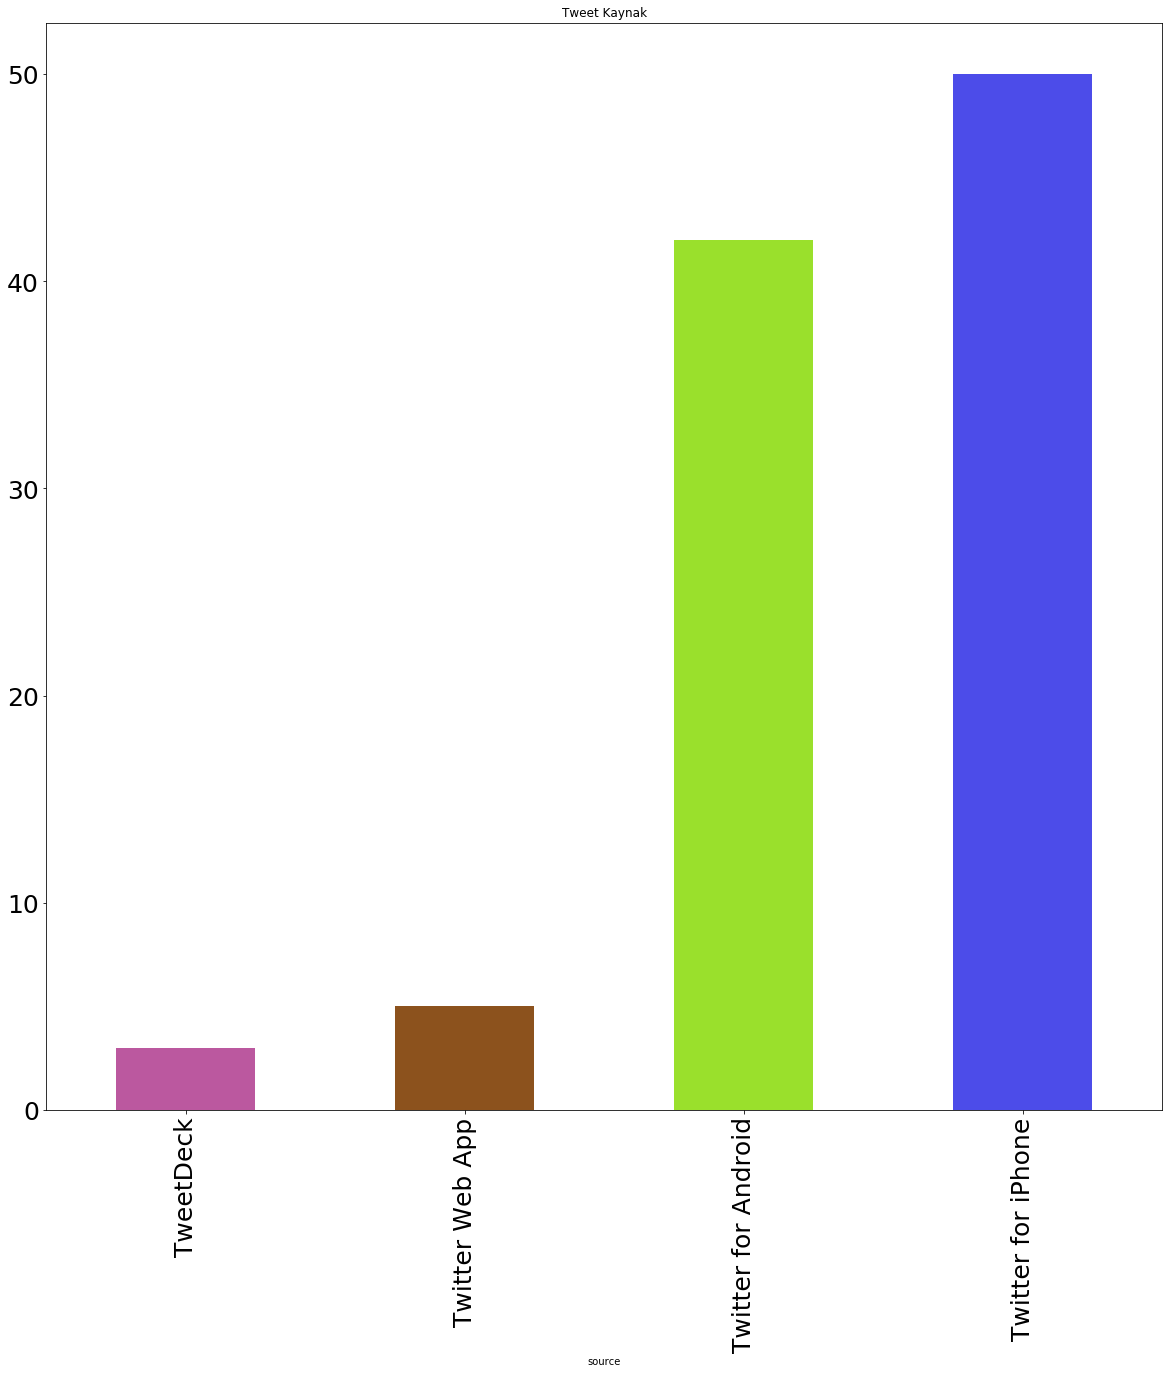

In [42]:
tweetkaynak(os.getcwd(),"329")

In [649]:
basitHashtag("pazartesi","3")

0    RT @Yusuf_Khe: Başka şehirliler de sanıyor ki;...
1    RT @nihat_soylu_: -Aziz ALLAH..☝🏻\nSabahul Hay...
2    RT @Umit_Turhan: “Devler gibi eserler bırakmak...
Name: text, dtype: object

In [40]:
ozgunlukOranı(df)

'Tweetlerin özgünlük oranı :0.89'

In [43]:
tweetsayisi(df)

'Toplam tweet sayısı :100'

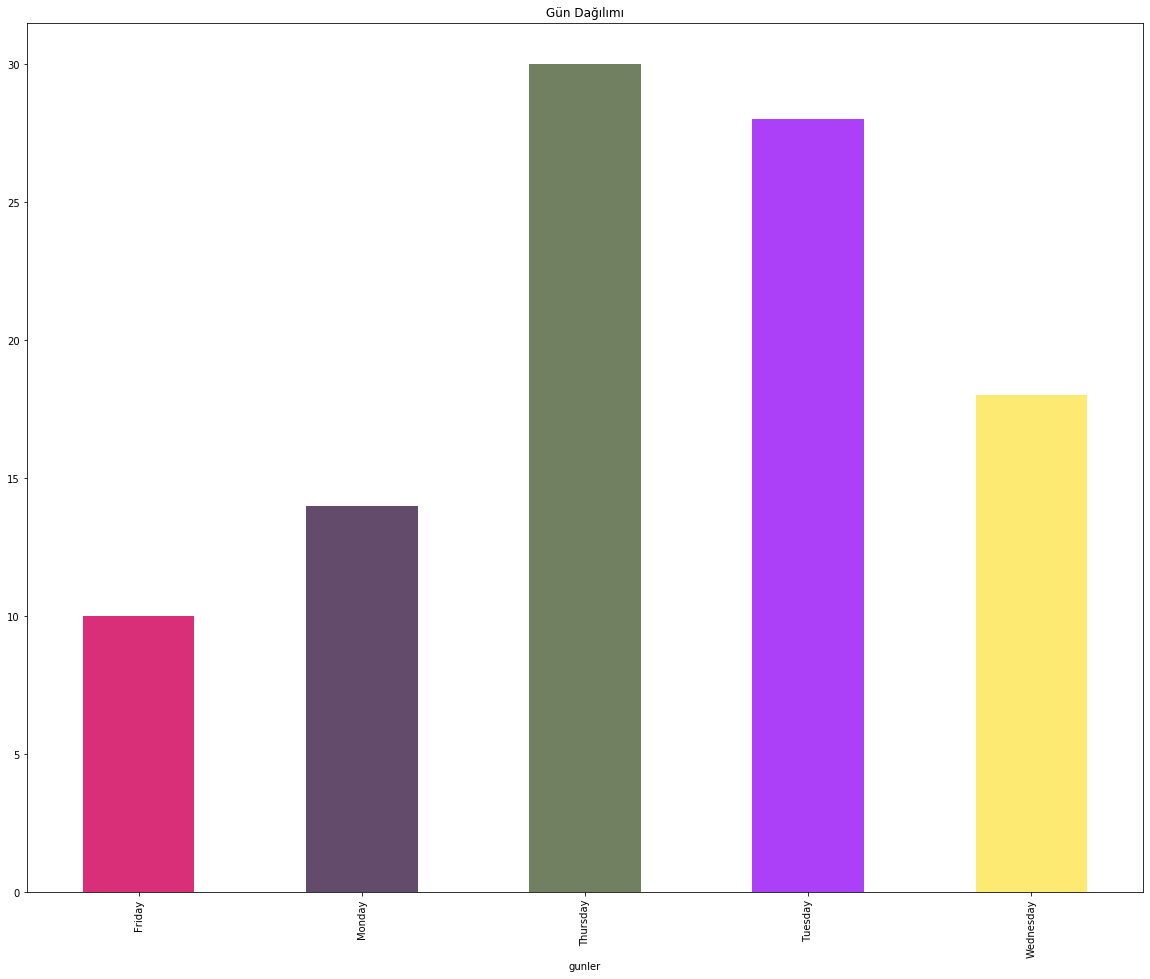

In [44]:
tweetgundagilimi(os.getcwd(),"329")

In [45]:
gecenKelimelerX(os.getcwd(),"329",25)

,kelimeler,frekanslar
2,arel,43.0
478,logo,18.0
27,,11.0
130,tasarım,10.0
14,üniversitesi,9.0
16,burslu,9.0
58,bir,8.0
345,evrim,6.0
0,istanbul,5.0
355,survivor,5.0


In [46]:
gecenKelimeler(os.getcwd(),"329")

,kelimeler,frekanslar
2,arel,43.0
478,logo,18.0
27,,11.0
130,tasarım,10.0
14,üniversitesi,9.0
16,burslu,9.0
58,bir,8.0
345,evrim,6.0
0,istanbul,5.0
355,survivor,5.0


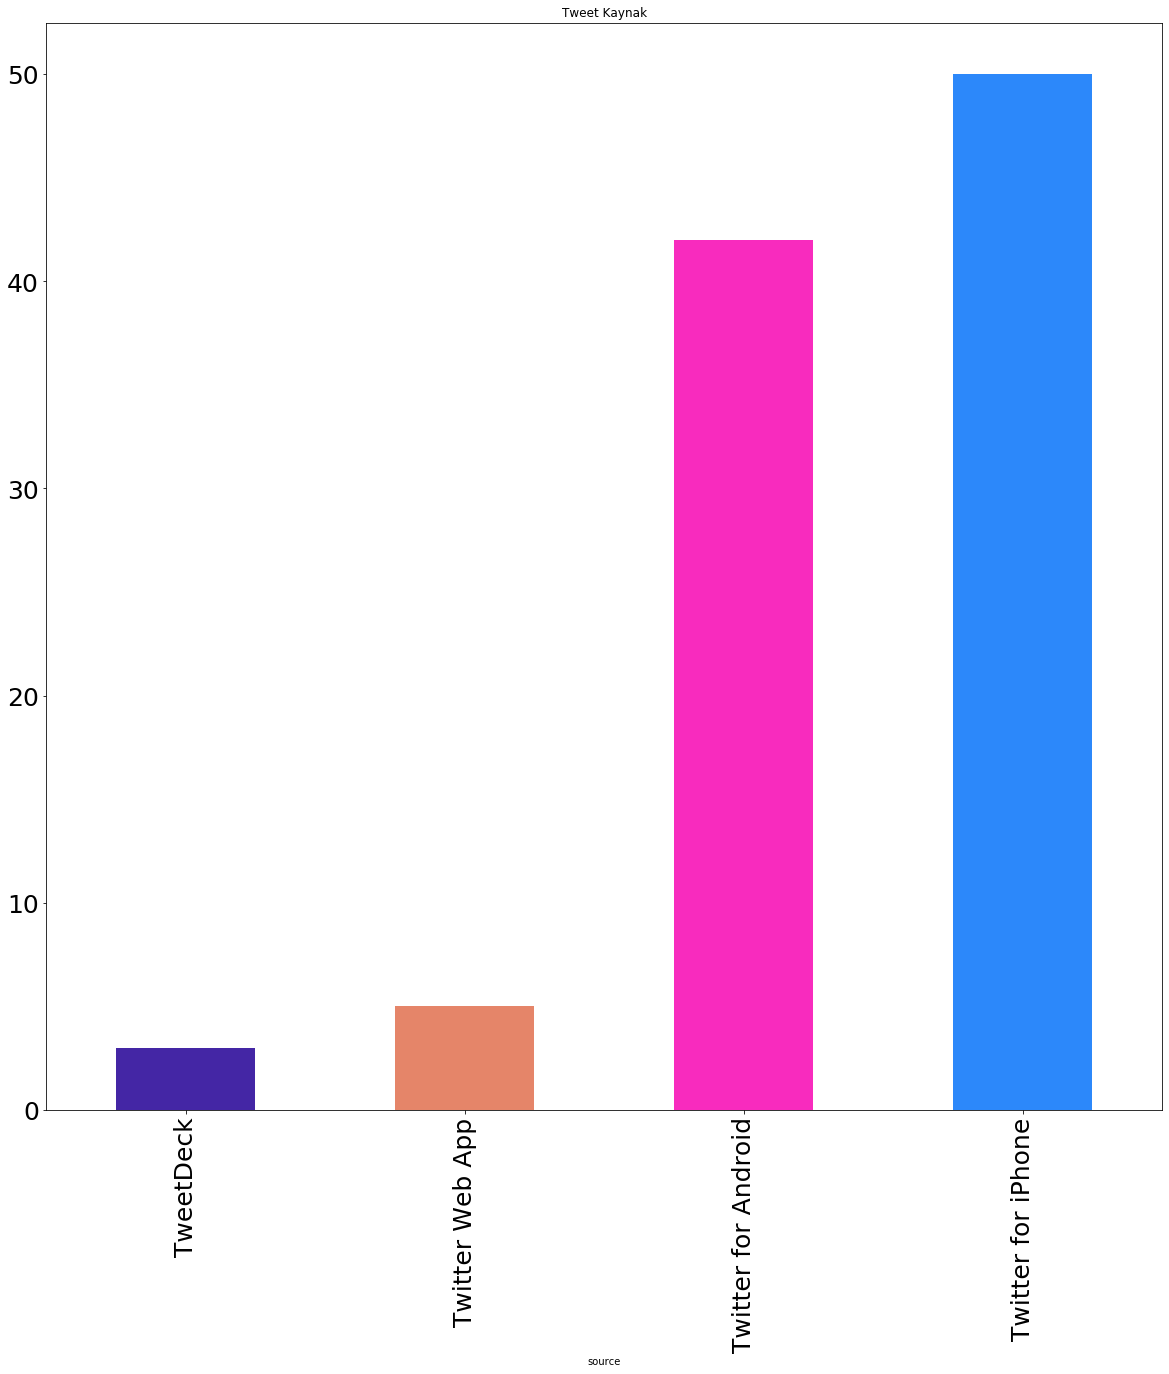

In [47]:
tweetkaynak(os.getcwd(),"329")

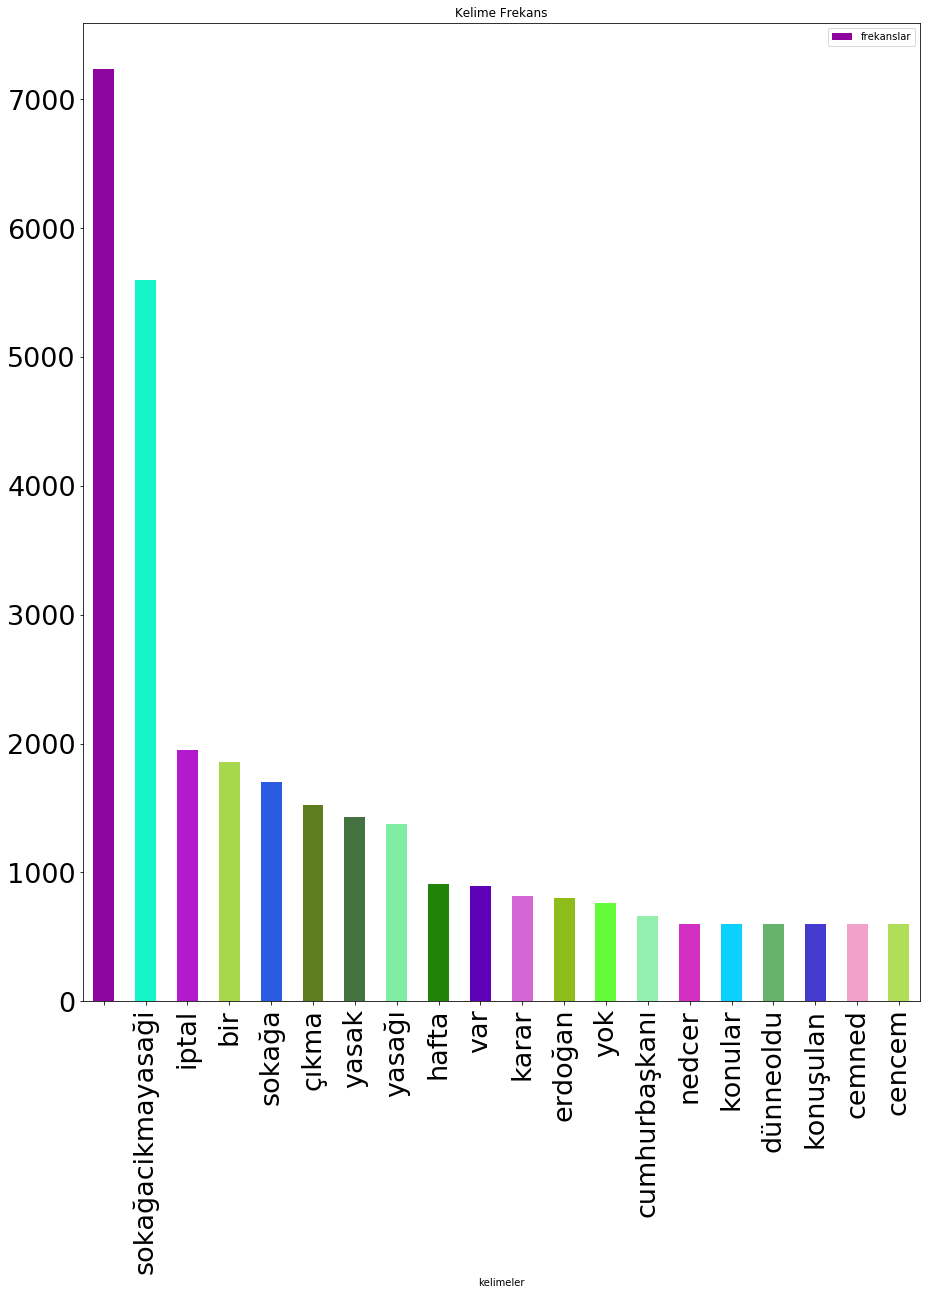

In [13]:
analizBar(os.getcwd(),"329",20)

user_location
                           65
İstanbul, Türkiye           7
N E O C I T Y               3
Indonesia                   1
ANKARA/MAMAK                1
Afyonkarahisar              1
Afyonkarahisar, Türkiye     1
Ankara'da                   1
Babuşistan                  1
Bayern, Deutschland         1
Name: id, dtype: int64


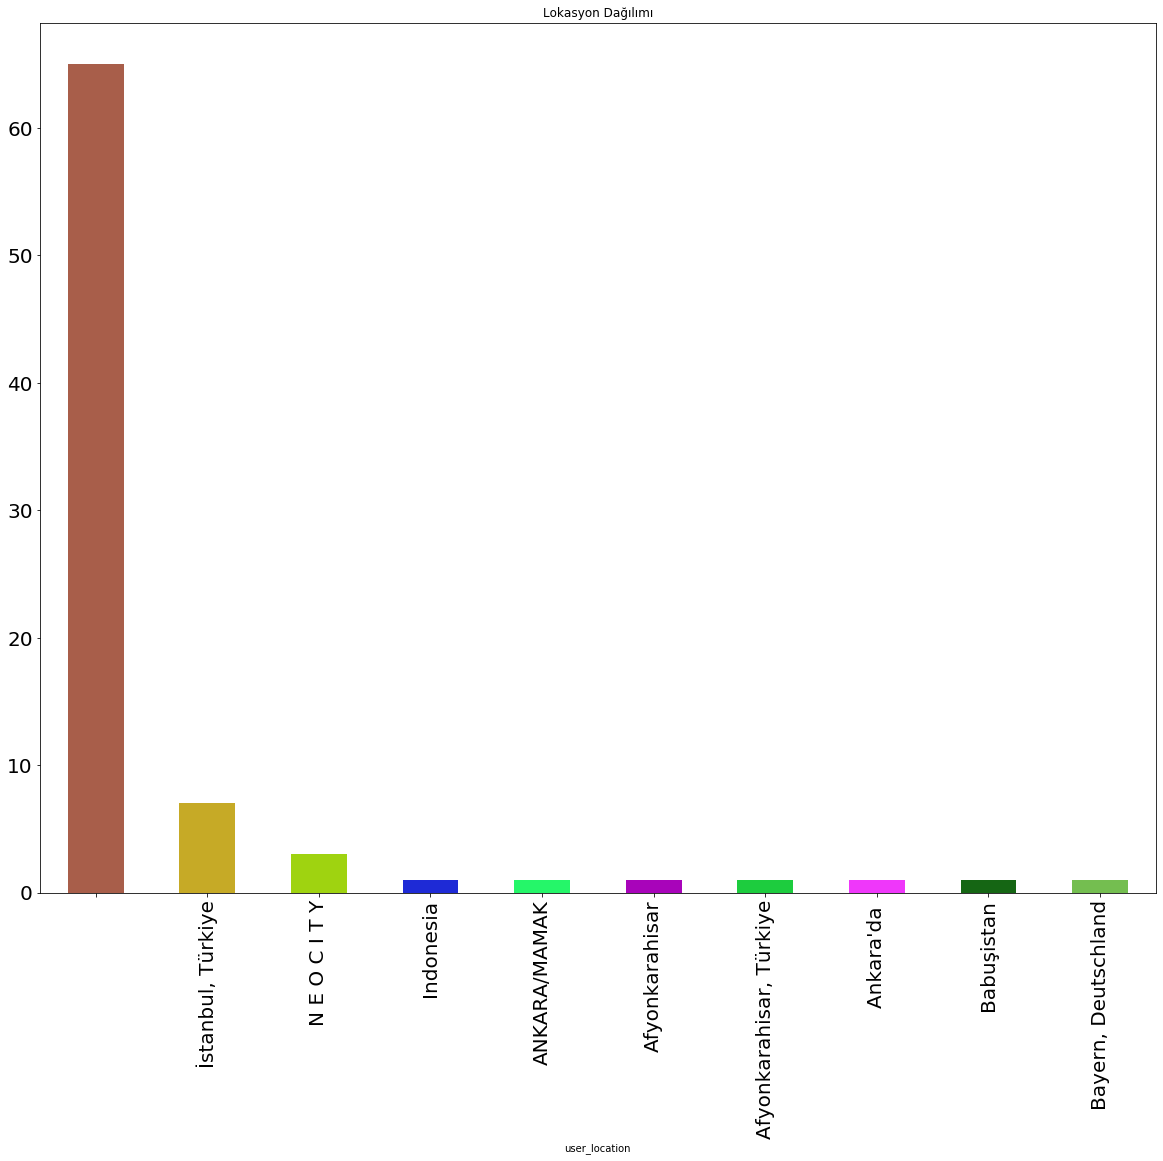

In [48]:
lokasyondagalimi(os.getcwd(),"329",30)

In [49]:
retweetsayilari(os.getcwd(),"329",10)

,retweet_count
text,
afyonbelediyesk tb meksa yatırım afyon belediyespor arel üniversitesi büyükçekmece afyonbasketboluseviyor httpstcorhqywpp,2
ogrencidekani çocukların yeri eğitim öğretim yuvaları parklardır hazirandünyaçocukişçiliğiylemücadelegünü areledu ogrencidek,2
yandimkaldim harika bir program oldu emeği geçen herkese sonsuz teşekkürler dijitalfarkindalik dijitalfarkındalık istanbul arel,2
merhaba arel yaş aktif pasif oluyorum izmir kusadasıgay bornovagay alsancakgay httpstcoegaafxq,1
rrabrusun cintankri idtodayco mr___n_____ hisyammochtar hp_arel nadine_oliv sama² ade,1
radyosivrisinek kafaradyo radyoland yılönceben liseyi yeni bitirdim istanbul arel üniversitesini kazandım httpstcotbsfmjfch,1
pekiiiozamaan bbarisgunes yankı arel,1
onlara ihtiyacın olduğu zaman kaybolurlar sürekli kendileri hakkında konuşurlar senin hatalarını başarısızlı httpstcoifuowkn,1
odanızı aesthetic hale getirmek ipuçları httpstcopfigfjwcz,1


In [28]:
data=df[['retweet_count', 'text']].groupby("text").mean().sort_values(by='retweet_count',ascending=False).iloc[0:10]

In [34]:
data

,retweet_count
text,
ceiaisengor burdan ülkeyi yöneten kişilere sesleniyorum whatsapp bir uygulama var indirin birbirinizle haberleşip mesajlaşabi,2428.057143
atakiizi bir acemi er yatakhanede sıkıştırılıyor ere devrecilik adı altında fiziki eziyet ediliyor paylaşalım gerekli yerlere u,2085.319372
ressambob şuraya hafta içi dinlenip sadece hafta sonları bulaşan bir virüs çizelim sokağacikmayasaği httpstcosdkzuav,1987.826816
gokhanozoguz abi şimdi çıkıyomuyuz çıkmıyomuyuz sokağacikmayasaği,1765.866242
themarglnale dün korona hafta içi bulaşmıyor diyerek yasağı eleştirenler bugün cumhurbaşkanı erdoğan yasağı iptal edince iptal ka,1274.000000
dedektifpipo vefalı virüs dediğin böyle olur haftaiçi izin haftasonu çalışıyor saat a kadar izinli avmler bulaşma alanı değ,1143.000000
kacsatolduturk sağlık bakanı sokağa çıkma yasağının kaldırıldığını duyuralı gün içişleri bakanlığı ilde hafta sonu sokağa çıkm,1089.000000
turanbulent dayı sen yapıyorsun yildirimkaya demokratiksiyaset dünyaçevregünü meclisteterörististemiyoruz darbeciakp,858.780142
tasdemir_cemile cumhurbaşkanımız sokağa çıkma yasağında halkının yanında olmayı tercih etti yasağı kaldırdı real sokağacikma,834.922481


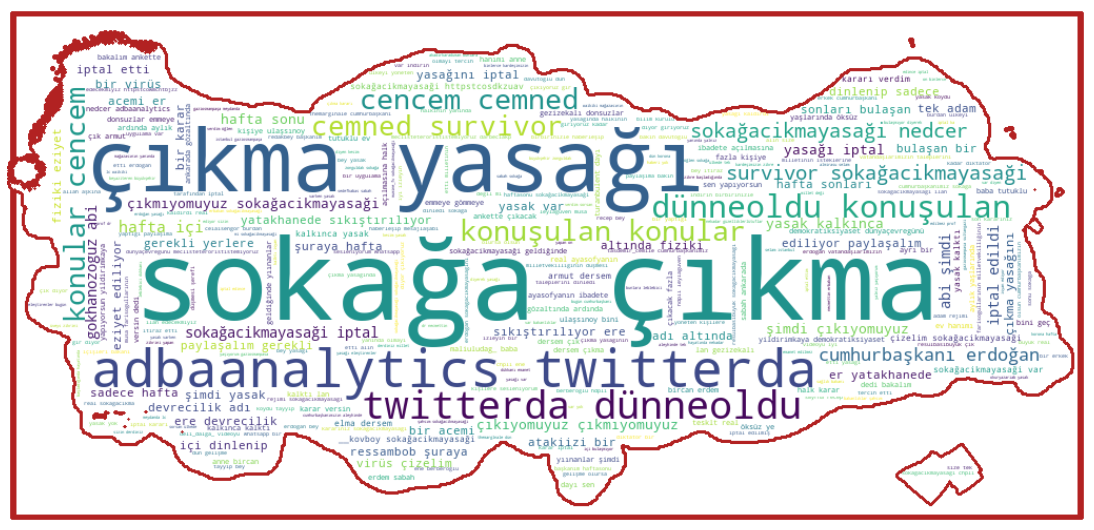

In [32]:
resimharitası("trr.png",os.getcwd(),"329",df,500)